In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from kmeans import KMeans
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Load data (pick up from where we left off in preprocess_data.ipynb)

In [14]:
# Load pickles
data = pd.read_pickle("data.pkl")
PCA_ds = pd.read_pickle("PCA_ds.pkl")
scaled_ds = pd.read_pickle("scaled_ds.pkl")

# Set the same nice colors
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [15]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.013562,0.009042,0.150542,512.144213,55.086347,607.268083,0.645570,0.947559,2.593128,0.714286
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.115691,0.094678,0.357683,232.551465,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,340.000000,47.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,513.000000,54.000000,397.000000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,686.000000,65.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1063.000000,84.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


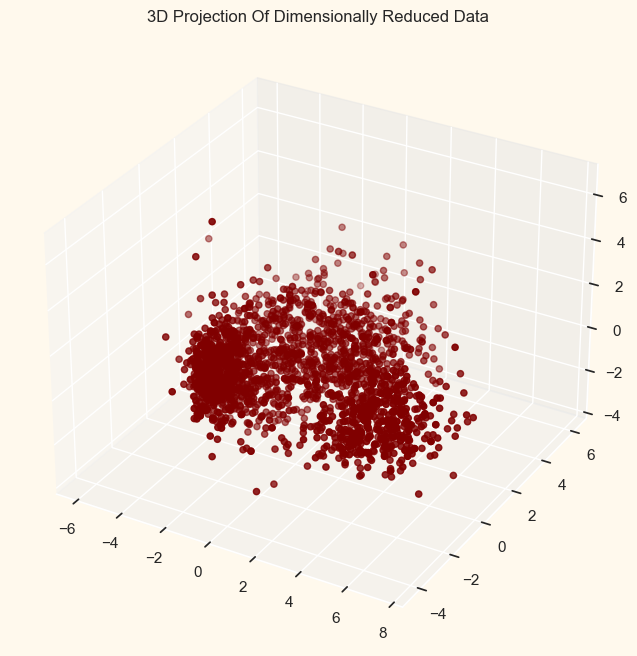

In [16]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D Projection Of Dimensionally Reduced Data")
plt.show()

# Clustering

From the elbow method, we already know that the optimal number of clusters is 4.
Repeat clustering now with hand-built K-means algorithm


NOTE: KMeans supports only 2-dimensional data. Use just the first two principal components of the data.

Steps:
- Clustering via KMeans
- Examining the clusters formed via scatter plot


In [47]:
# Four is the optimal number of clusters

#Initiating the Agglomerative Clustering model 
k = KMeans(K=4, max_iters=300, plot_steps=False)

# fit model and predict clusters
# reduce PCA data to two dimensions first
PCA_ds = PCA_ds[["col1","col2"]]

# convert to numpy array
PCA_ds_values = PCA_ds.values

yhat_KM = k.predict(PCA_ds_values)
PCA_ds["Clusters"] = yhat_KM

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_KM

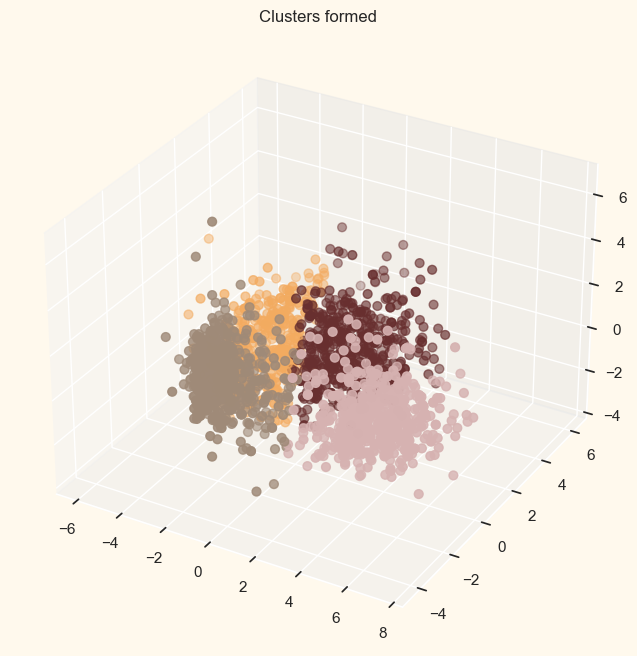

In [48]:
# Examine clusters formed
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Clusters formed")
plt.show()

# Model evaluation
Since this is an unsupervised clustering, we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will look at the data in light of clusters via exploratory data analysis and by drawing conclusions.

Firstly, we look at the group distribution of clustring


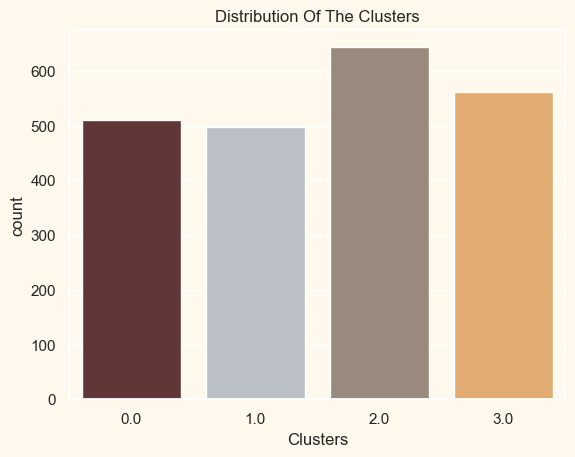

In [49]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


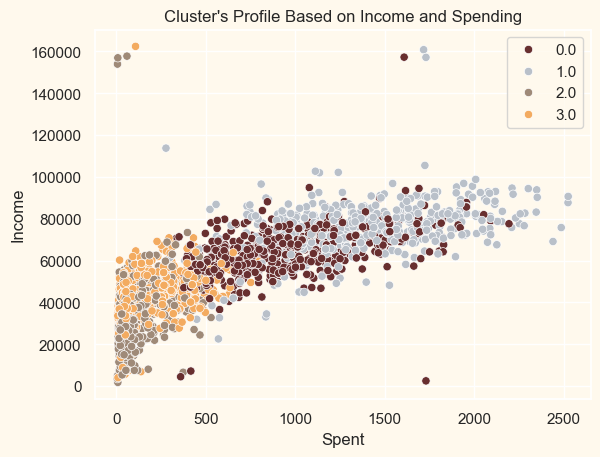

In [52]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

### Income vs spending plot shows the clusters pattern

- Group 0: high spending & average income
- Group 1: high spending & high income
- Group 2: low spending & low income
- Group 3: high spending & low income


Next, let's look at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

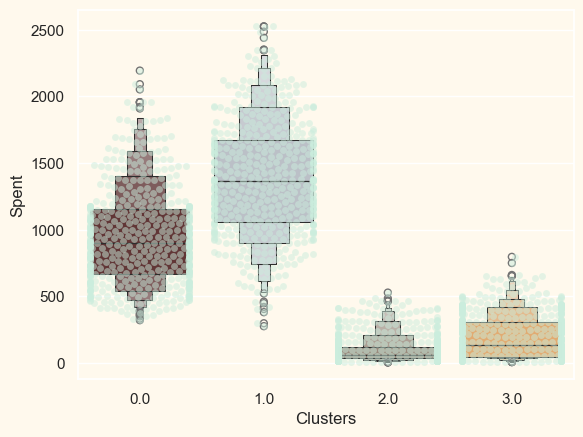

In [53]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

Observation: 
- Clusters 2 and 0 are the largest set of customers.
- We can explore what each group is spending on for the targeted marketing strategies

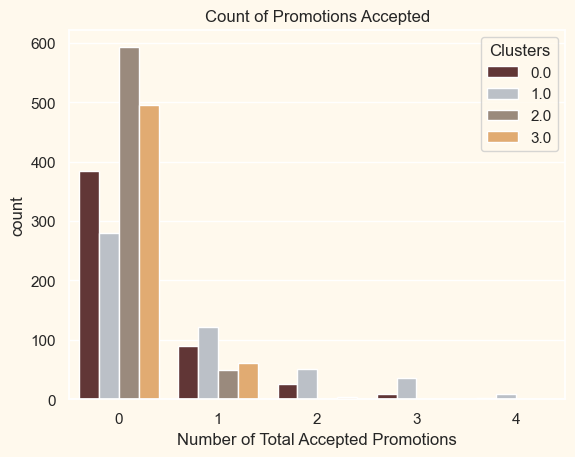

In [54]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count of Promotions Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

#### Observation: 

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

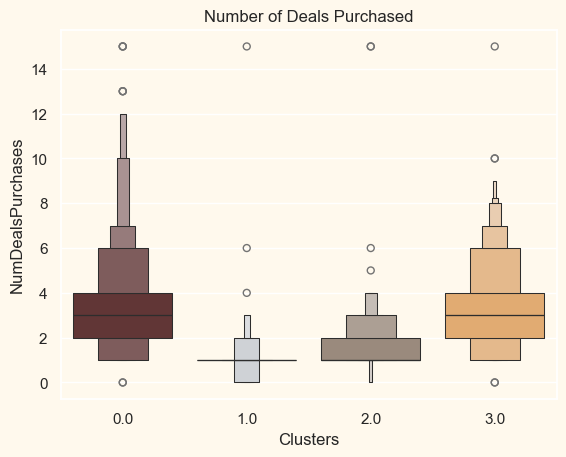

In [55]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

#### Observation
Unlike campaigns, the deals offered did well. It had the best outcome with clusters 0 and 3. However, our star customers in cluster 2 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly.

# Profiling

Now that we have formed the clusters and looked at their purchasing habits, let's see who's in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that, let's plot some of the features that are indicative of the customer's personal traits in light of the cluster they are in.

 Then, we can form some conclusions.


<Figure size 640x480 with 0 Axes>

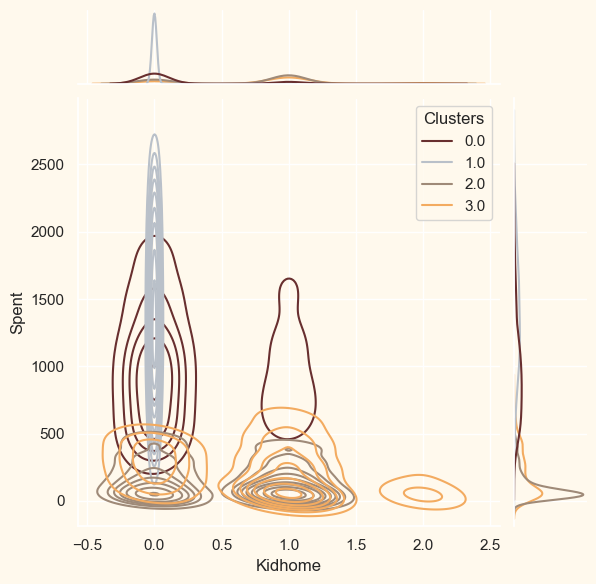

<Figure size 640x480 with 0 Axes>

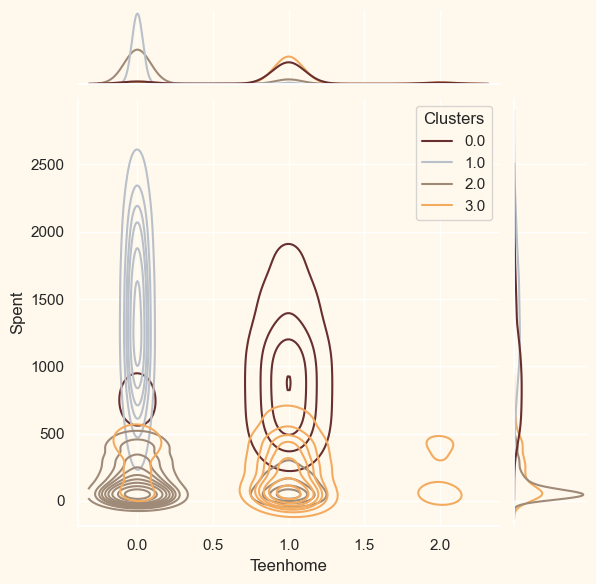

<Figure size 640x480 with 0 Axes>

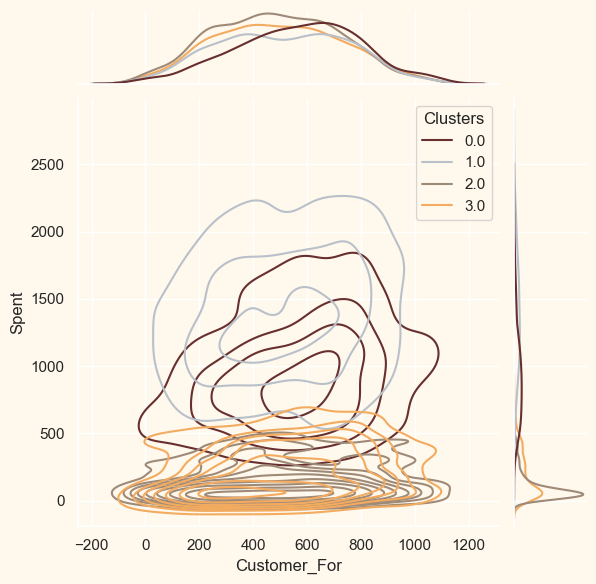

<Figure size 640x480 with 0 Axes>

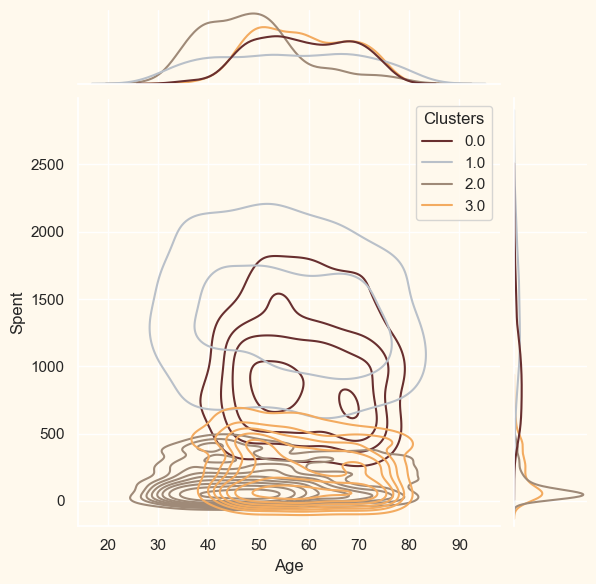

<Figure size 640x480 with 0 Axes>

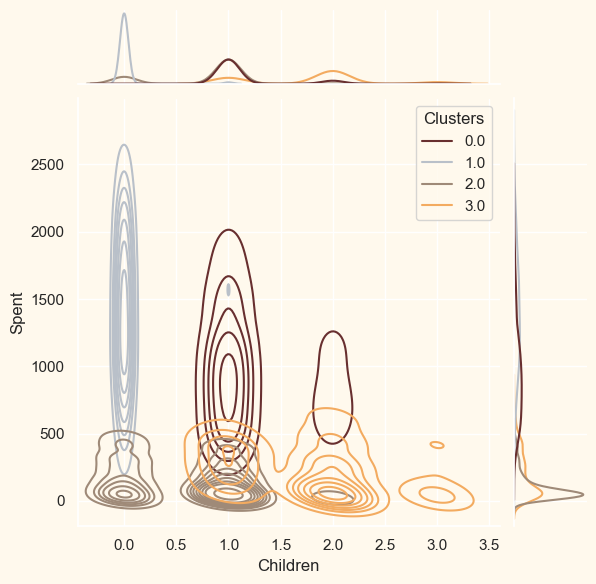

<Figure size 640x480 with 0 Axes>

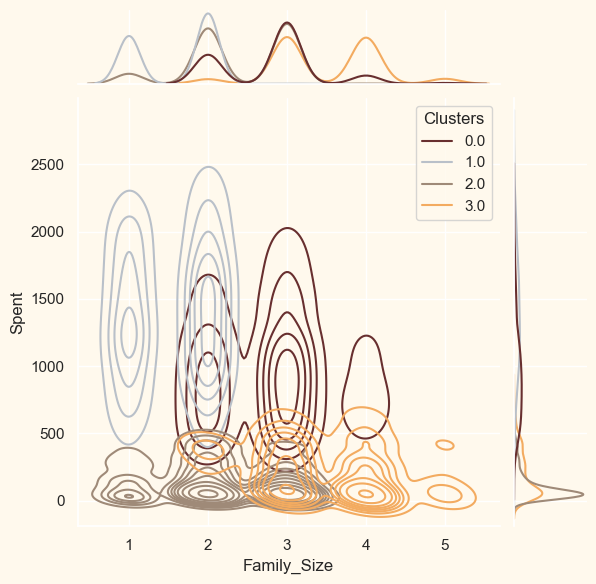

<Figure size 640x480 with 0 Axes>

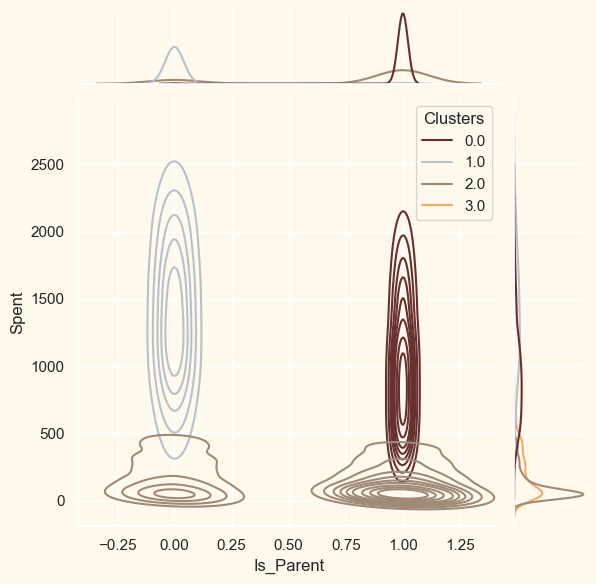

<Figure size 640x480 with 0 Axes>

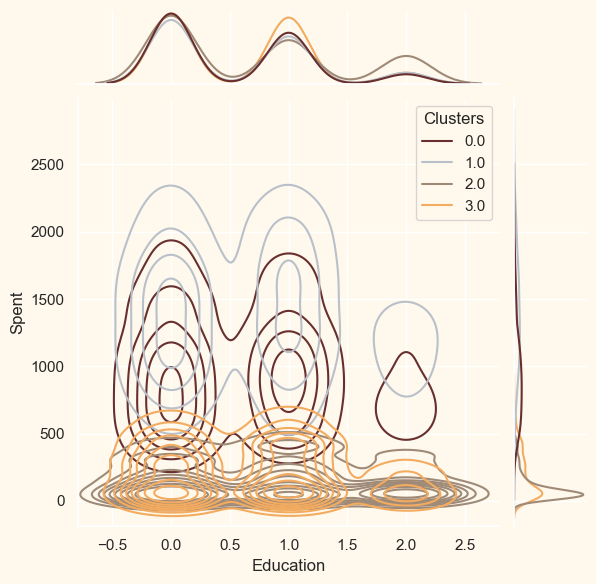

<Figure size 640x480 with 0 Axes>

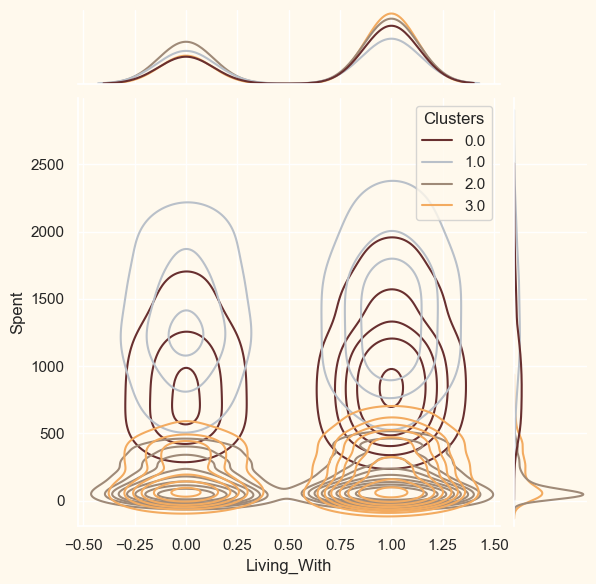

In [56]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

# Conclusion:

KMeans with two Principal Components results in about the same conclusions as the AG clustering with three principal components, however, important features for cluster 1 were missing, particularly for the TeenHome feature.